In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset (example: Iris dataset) 
iris = datasets.load_iris() 
X = iris.data 
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Create SVM classifier with a poly kernel
clf = SVC(kernel='poly', C=1 )
clf

SVC(C=1, kernel='poly')

In [5]:
# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [6]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [7]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [8]:
# Create an SVM classifier with linear kernel
svm_clf = SVC(kernel='linear')

In [9]:
def plot_decision_boundaries(X, y, model, title):
    # Create a grid of points to plot
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

Poly Kernel Graph


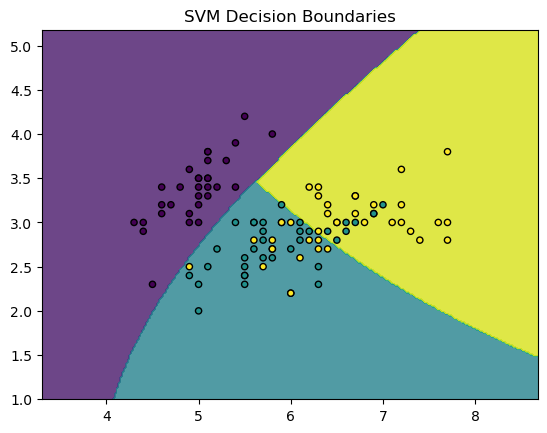

In [10]:
# Use only the first two features for visualization purposes
print("Poly Kernel Graph")
clf.fit(X_train[:, :2], y_train)
plot_decision_boundaries(X_train[:, :2], y_train, clf, "SVM Decision Boundaries")

Linear Kernel Graph


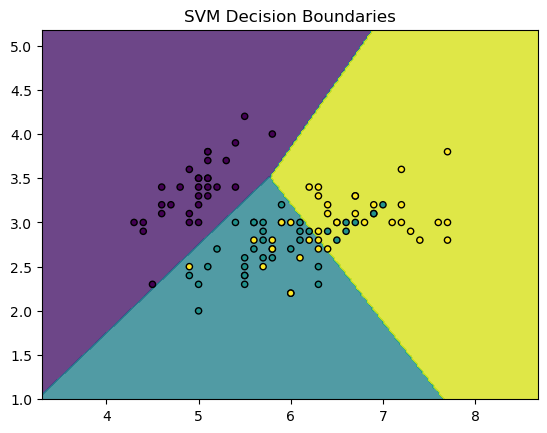

In [11]:
# Use only the first two features for visualization purposes
print("Linear Kernel Graph")
svm_clf.fit(X_train[:, :2], y_train)
plot_decision_boundaries(X_train[:, :2], y_train, svm_clf, "SVM Decision Boundaries")

Accuracy with C=0.01: 0.98
Accuracy with C=0.1: 1.00
Accuracy with C=1: 0.98
Accuracy with C=10: 1.00
Accuracy with C=100: 1.00


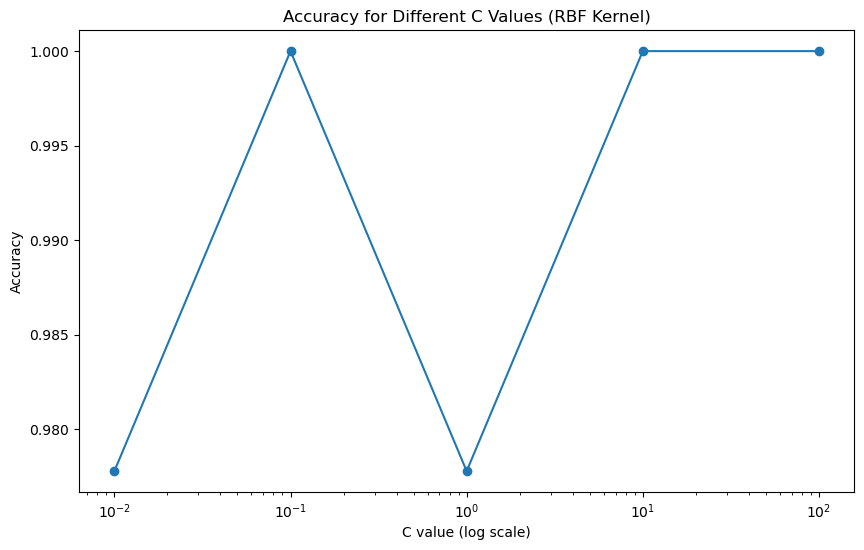

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store accuracy for each C value
accuracy_dict = {}

# Train and evaluate the SVM classifier with different C values
for C in C_values:
    svm_clf = SVC(kernel='poly', C=C)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[C] = accuracy
    print(f'Accuracy with C={C}: {accuracy:.2f}')

# Optionally, visualize the accuracies for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, list(accuracy_dict.values()), marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values (RBF Kernel)')
plt.show()

In [17]:
from sklearn.svm import SVC

# Example with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma=1)  # gamma can be adjusted

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [21]:
# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


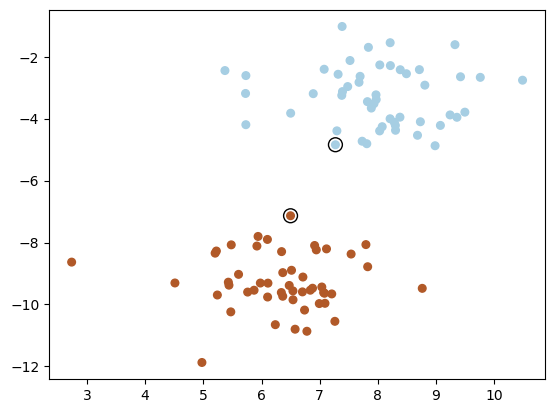

In [22]:
# Generate a simple dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=100, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Train SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


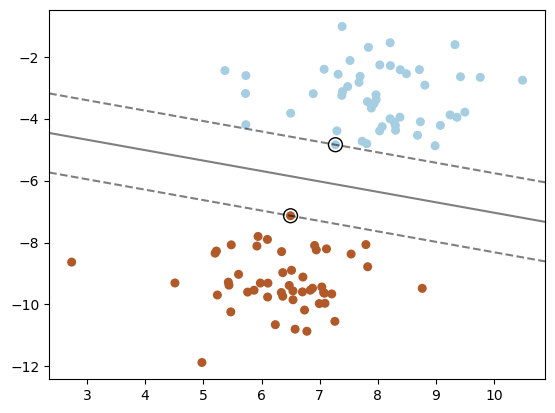

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import numpy as np

# Generate a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Train SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset (example: Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noise to the features
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape)
X_noisy = X + noise

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 11  2]
 [ 0  3 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      0.85      0.81        13
           2       0.83      0.77      0.80        13

    accuracy                           0.89        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



[[35  6]
 [11 38]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.86      0.78      0.82        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



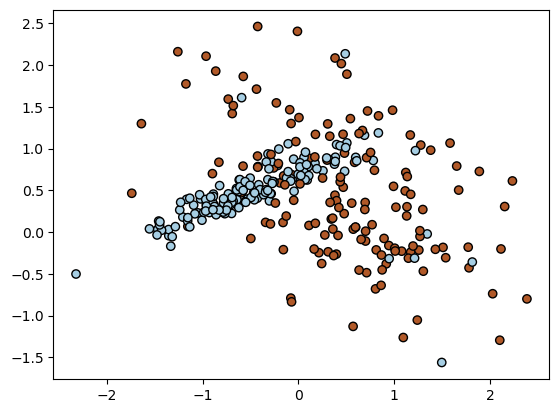

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

[[35  6]
 [11 38]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.86      0.78      0.82        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



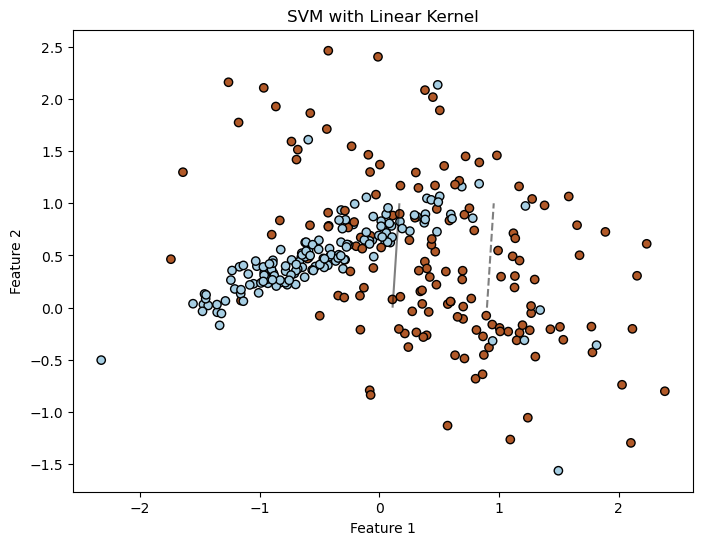

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the decision boundary and the dataset
plt.figure(figsize=(8, 6))

# Plot decision boundary (only for binary classification)
if len(np.unique(y)) == 2:
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


[[35  6]
 [11 38]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.86      0.78      0.82        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



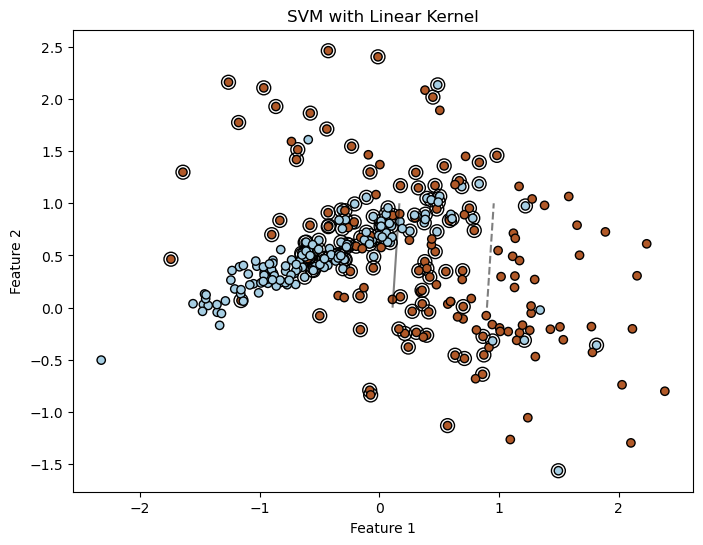

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get support vectors and decision function values
support_vectors = clf.support_vectors_
decision_function = clf.decision_function(support_vectors)

# Plot the decision boundary, margins, and support vectors
plt.figure(figsize=(8, 6))

# Plot decision boundary (only for binary classification)
if len(np.unique(y)) == 2:
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


[[35  6]
 [11 38]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.86      0.78      0.82        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



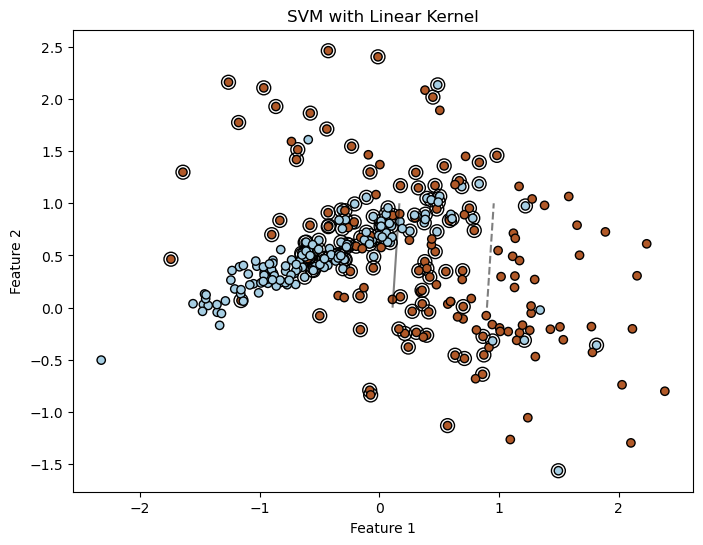

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get support vectors and decision function values
support_vectors = clf.support_vectors_
decision_function = clf.decision_function(support_vectors)

# Plot the decision boundary, margins, and support vectors
plt.figure(figsize=(8, 6))

# Plot decision boundary (only for binary classification)
if len(np.unique(y)) == 2:
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
